In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
!pip uninstall tensorflow 
!pip install tensorflow==2.0
!pip install tensorflow_hub latest

^C
^C
^C


In [3]:
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import pandas as pd
import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

ModuleNotFoundError: No module named 'tensorflow_hub'

In [5]:
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\ronle\Desktop\ITC\course\Data_science_project\covid_tweets\pos_and_neg_tweets_balanced_2.csv")
df.head()

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,date,text,favorites,retweets,is_retweet,category
0,0,northshoremed,North Shore of Massachusetts,Official twitter feed of North Shore Medical C...,2012-04-06 14:52:39,1931,2021-02-09 16:17:15,"""I just received the COVID-19 vaccine and I no...",3,0,False,Positive
1,1,GalwayCSD,"Galway, NY",Educate all students to their highest level of...,2018-08-13 16:22:02,216,2021-02-09 15:42:52,RT @SaratogaChamber: Thanks @WSWHEBOCES for ho...,0,1,True,Positive
2,2,gcavello,Duncanville TX.,Prayer is the key! Never stop praying! God is...,2008-10-20 12:42:22,123,2021-02-09 15:17:56,Jjust got our 2nd dose of the Pfizer Covid-19 ...,2,0,False,Positive
3,3,SaratogaChamber,NaN,We believe in opening doors & closing deals. #...,2008-09-26 02:39:14,8831,2021-02-09 15:15:39,Thanks @WSWHEBOCES for hosting a vaccination c...,8,1,True,Positive
4,4,sondravet22,NaN,I AM A VIETNAM ERA SERVICE CONNECTED VET. I BE...,2019-01-18 07:11:11,160,2021-02-09 15:15:06,"RT @medcoe: #GetTheShot💉🦠 \n\nMr. Duane Hill, ...",0,3,True,Positive


In [6]:
df_text = df.loc[:, ['text','category']]
df_text

,text,category
0,"""I just received the COVID-19 vaccine and I no...",Positive
1,RT @SaratogaChamber: Thanks @WSWHEBOCES for ho...,Positive
2,Jjust got our 2nd dose of the Pfizer Covid-19 ...,Positive
3,Thanks @WSWHEBOCES for hosting a vaccination c...,Positive
4,"RT @medcoe: #GetTheShot💉🦠 \n\nMr. Duane Hill, ...",Positive
...,...,...
18486,RT @NickHudsonCT: Raising conflicts of interes...,Negative
18487,RT @NickHudsonCT: Raising conflicts of interes...,Negative
18488,RT @NickHudsonCT: Raising conflicts of interes...,Negative
18489,RT @NickHudsonCT: Raising conflicts of interes...,Negative


In [14]:
df_text.category.value_counts()

Negative    9587
Positive    8904
Name: category, dtype: int64

In [7]:
import re

df_text["up_text"] = df_text.text.str.lower()
#Remove twitter handlers
df_text.up_text = df_text.up_text.apply(lambda x:' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))

In [8]:
from sklearn.model_selection import train_test_split

X = df_text['up_text']
y = df_text['category']

y = pd.concat([y, pd.get_dummies(y, prefix='target')],axis=1)
y.drop(['category', 'target_Positive'],axis=1, inplace=True)
train_examples, test_examples, train_labels,  test_labels = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [15]:
print(train_examples.shape[0]/len(df_text), test_examples.shape[0]/len(df_text)) # proportion train / test for the split
print(set(train_examples.index) & set(test_examples.index)) # are train and test datasets overlapping ? 

0.799956735709264 0.20004326429073604
set()


In [23]:
type(y)

pandas.core.frame.DataFrame

In [9]:
print("Training entries: {}, test entries: {}".format(len(train_examples), len(test_examples)))

Training entries: 14792, test entries: 3699


Let's print first 10 examples.

In [10]:
train_examples[:10]

6762     how many years will you throw down the drain b...
7902     rt when not if the nhs is privatised and inste...
15624    rt raising conflicts of interest does not make...
6913     thread dug up some facts about covid deaths vs...
8332     rt the elderly are terrified that they might r...
2840     researchers have found that over the past 20 y...
17929    today was vasectomies x 8 one guy spewed forth...
3341     rt i m getting vaccinated because the vaccine ...
5943     rt prediction 1 the vaccine will change nothin...
5458     you were wasting your time but they say god lo...
Name: up_text, dtype: object

Let's also print the first 10 labels.

In [11]:
train_labels[:10]

,target_Negative
6762,1
7902,1
15624,1
6913,1
8332,1
2840,0
17929,1
3341,0
5943,1
5458,1


In [12]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

NameError: name 'hub' is not defined

In [11]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 50)                48190600  
_________________________________________________________________
dense (Dense)                (None, 16)                816       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [13]:
x_val = train_examples[:100]
partial_x_train = train_examples[100:]

y_val = train_labels[:100]
partial_y_train = train_labels[100:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
29/29 [==============================] - 2s 44ms/step - loss: 0.6383 - accuracy: 0.6580 - val_loss: 0.4760 - val_accuracy: 0.8900
Epoch 2/40
29/29 [==============================] - 1s 31ms/step - loss: 0.4120 - accuracy: 0.9097 - val_loss: 0.2544 - val_accuracy: 0.9600
Epoch 3/40
29/29 [==============================] - 1s 31ms/step - loss: 0.2160 - accuracy: 0.9534 - val_loss: 0.1507 - val_accuracy: 0.9600
Epoch 4/40
29/29 [==============================] - 1s 31ms/step - loss: 0.1142 - accuracy: 0.9744 - val_loss: 0.1047 - val_accuracy: 0.9700
Epoch 5/40
29/29 [==============================] - 1s 31ms/step - loss: 0.0687 - accuracy: 0.9843 - val_loss: 0.0802 - val_accuracy: 0.9800
Epoch 6/40
29/29 [==============================] - 1s 31ms/step - loss: 0.0449 - accuracy: 0.9916 - val_loss: 0.0667 - val_accuracy: 0.9800
Epoch 7/40
29/29 [==============================] - 1s 31ms/step - loss: 0.0332 - accuracy: 0.9938 - val_loss: 0.0596 - val_accuracy: 0.9800
Epoch 8/40
29

In [15]:
results = model.evaluate(test_examples, test_labels)

print(results)

116/116 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9919
[0.031750284135341644, 0.9918897151947021]


In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

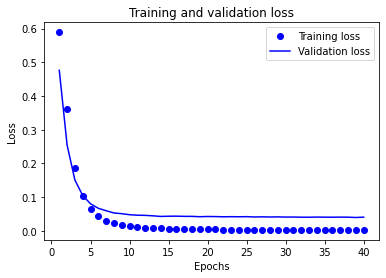

In [17]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

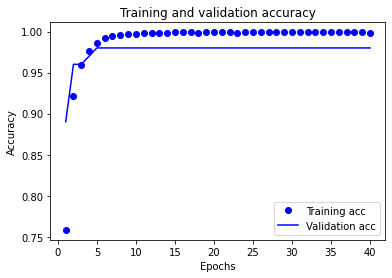

In [18]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()